In [94]:
# check if these degree day factors make sense 

import pandas as pd
import matplotlib.pyplot as plt

In [148]:
path = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/4landcover/'
hydro = pd.read_csv(path + 'langtang_climate_cut/20b/Hydro.out')#.set_index('D')

In [149]:
hydro

,D,Q,Qs,Qss,Vw,snow,snowacc,PET,AET,Pr,Ta,glacier_melt
0,1989-09-01 00:00:00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,3.002059,0.000000,0.002813,0.160305,0.0
1,1989-09-01 01:00:00,0.000220,0.0,0.000220,0.008214,0.000000,0.000000,0.000000,0.000000,0.008434,0.757045,0.0
2,1989-09-01 02:00:00,0.000295,0.0,0.000295,0.014136,0.000000,0.000000,0.093212,0.005029,0.011247,1.741725,0.0
3,1989-09-01 03:00:00,0.000001,0.0,0.000001,0.011833,0.000000,0.000000,0.365540,0.016361,0.014059,3.265584,0.0
4,1989-09-01 04:00:00,0.000002,0.0,0.000002,0.012189,0.000000,0.000000,0.773920,0.009481,0.009838,4.096215,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
289987,2022-09-30 19:00:00,0.004050,0.0,0.004050,0.949250,11602.576042,0.002477,1.876969,0.000000,0.002477,-2.390315,0.0
289988,2022-09-30 20:00:00,0.004032,0.0,0.004032,0.945218,11602.576042,0.000000,1.863163,0.000000,0.000000,-2.580215,0.0
289989,2022-09-30 21:00:00,0.004015,0.0,0.004015,0.941203,11602.578515,0.002474,1.855357,0.000000,0.002474,-2.687655,0.0
289990,2022-09-30 22:00:00,0.003998,0.0,0.003998,0.937204,11602.578515,0.000000,1.847963,0.000000,0.000000,-2.789465,0.0


<AxesSubplot:>

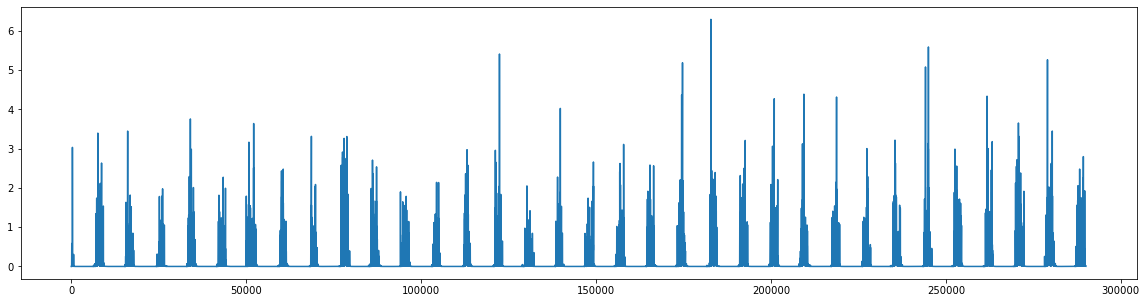

In [159]:
plt.figure(figsize = (20, 5))
# hydro.snow.plot()
hydro.Q.plot()

In [151]:
# count snow days

# hydro = hydro[hydro.snowacc > 0]
hydro['snowday_count'] = hydro['snow'].apply(lambda x: 1 if x > 0 else 0)



In [152]:
# hydro.snowday_count.plot()

In [160]:
# Define your custom function
def count_snow_hours(df):
    df['D'] = pd.to_datetime(df['D'])
    df['Year'] = df['D'].dt.year
    df = df.resample('D').mean()
    annual_sum = df.groupby('Year').sum()
    count = annual_sum.snowday_count.mean()
    return annual_sum

In [161]:
count = count_snow_days(hydro)


In [165]:
count['snowday_count_day'] = count.snowday_count

<AxesSubplot:>

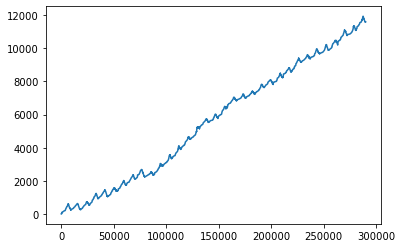

In [166]:
hydro.snow.plot()

In [167]:
# count.snowday_count_day
count


,Q,Qs,Qss,Vw,snow,snowacc,PET,AET,Pr,Ta,glacier_melt,snowday_count,snowday_count_day
Year,,,,,,,,,,,,,
1989,14.591030,6.783440,7.807590,1030.882280,3.356636e+05,192.187268,3139.702688,188.313304,395.094662,-19582.682594,0.0,2764,2764
1990,293.626013,195.582591,98.043422,14324.698331,3.135215e+06,166.034561,10440.796525,1746.836387,2206.496809,-44423.395540,0.0,8760,8760
1991,214.230194,135.230216,78.999978,10321.617524,3.705139e+06,41.963517,10509.989972,1649.289788,1905.483579,-48914.660380,0.0,8760,8760
1992,132.559818,80.146042,52.413776,7506.191040,5.222311e+06,310.043893,10681.628722,1297.485780,1740.116857,-52689.592062,0.0,8784,8784
1993,246.004889,167.447998,78.556891,11400.290703,8.923492e+06,378.870845,10447.640588,1524.187535,2149.049218,-44907.026070,0.0,8760,8760
1994,186.699562,118.547822,68.151740,8752.323530,1.062371e+07,75.503398,10669.461082,1729.175960,1991.366638,-49663.504550,0.0,8760,8760
1995,263.660839,175.932127,87.728712,14172.662702,1.255549e+07,387.942826,10471.736805,1639.558303,2291.164827,-49784.848540,0.0,8760,8760
1996,216.540898,139.237098,77.303800,10752.388647,1.596856e+07,360.092221,10458.650769,1508.985661,2085.673783,-48471.615162,0.0,8784,8784
1997,168.208302,104.123440,64.084862,8591.710312,1.899316e+07,445.469290,10223.116360,1443.624167,2057.268480,-59747.162550,0.0,8760,8760
